In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

import config as conf

from models.dcgan import DCGAN

In [2]:
hyparams = conf.HYPARAMS[conf.DATASET]

In [3]:
hyparams

{'disc_filters_list': [8, 16],
 'disc_strides_list': [2, 2],
 'gen_filters_list': [8, 1],
 'gen_strides_list': [2, 2],
 'project_shape': [7, 7, 16]}

In [4]:
model = DCGAN(
    project_shape=conf.HYPARAMS[conf.DATASET]["project_shape"],
    gen_filters_list=conf.HYPARAMS[conf.DATASET]["gen_filters_list"],
    gen_strides_list=conf.HYPARAMS[conf.DATASET]["gen_strides_list"],
    disc_filters_list=conf.HYPARAMS[conf.DATASET]["disc_filters_list"],
    disc_strides_list=conf.HYPARAMS[conf.DATASET]["disc_strides_list"]
)

In [5]:
x = np.random.normal(size=[3, 28, 28, 1]).astype(np.float32)
z = np.random.normal(size=[3, 20]).astype(np.float32)

In [6]:
model.generator(z, training=False).shape, model.discriminator(x, training=False).shape

(TensorShape([3, 28, 28, 1]), TensorShape([3, 1]))

In [7]:
# loader = tfds.load(name="mnist", data_dir=config.DATASET_PATH)
loader, info = tfds.load(name="mnist", with_info=True)

In [8]:
loader["train"]

<_OptionsDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [9]:
loader["test"].concatenate(loader["train"])

<ConcatenateDataset shapes: {image: (28, 28, 1), label: ()}, types: {image: tf.uint8, label: tf.int64}>

In [10]:
info.splits["train"].num_examples

60000

In [11]:
temp = loader["train"].repeat().shuffle(1024).batch(32)

In [12]:
temp.take(1)

<TakeDataset shapes: {image: (None, 28, 28, 1), label: (None,)}, types: {image: tf.uint8, label: tf.int64}>

(32, 28, 28, 1)
255


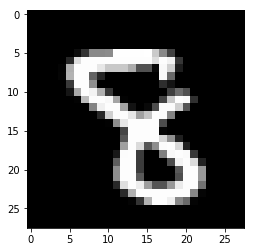

In [13]:
for temp_i in temp.take(1):
    print(temp_i["image"].shape)
    print(np.max(temp_i["image"]))
    plt.imshow(temp_i["image"][0, :, :, 0], cmap="gray")

In [14]:
temp2 = loader["test"].concatenate(loader["train"])
for temp_i in temp2.take(1):
    plt.imshow(temp_i["image"][0, :, :, 0], cmap="gray")

ValueError: Cannot merge incompatible values (True and False) of option: experimental_deterministic